# Introduction 
The paper Generating Non-Stationary Textures using Self-Rectification presents a new way to create complex, non-repeating textures. Traditional methods struggle with textures that change across an image, but the authors introduce Self-Rectification, which helps a neural network learn from a reference while following a user’s structure (like a sketch or outline). Using diffusion models, they refine textures to look natural and fit the layout. Tested on wood, fabric, and stone, the method preserves detail while adapting to different designs, making it useful for art, design, and computer graphics.


In this report, we reproduce the results of Figure 11 from the paper "Generating Non-Stationary Textures using Self-Rectification" by Yang Zhou et al. The method involves a two-step process:
- A user provides a rough layout of the desired texture.
- The self-rectification approach refines it using a pre-trained diffusion model.



This technique ensures that the generated textures maintain the structure outlined by the user while preserving fine details from the reference texture. Our goal is to implement this method, validate its effectiveness, and analyze the results.



# Set up environment

In [1]:
!git clone https://github.com/MasseyGhalayani/paper07_Self-Rectification

Cloning into 'paper07_Self-Rectification'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 292 (delta 10), reused 9 (delta 2), pack-reused 269 (from 1)
Receiving objects: 100% (292/292), 53.89 MiB | 38.03 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Updating files: 100% (267/267), done.


In [33]:
cd paper07_Self-Rectification/

[Errno 2] No such file or directory: 'paper07_Self-Rectification/'
/home/hpc/mrrr/mrrr120v/paper07_Self-Rectification


In [40]:
!git pull origin main

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 3 (delta 1), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 479.33 KiB | 5.92 MiB/s, done.
From https://github.com/MasseyGhalayani/paper07_Self-Rectification
 * branch            main       -> FETCH_HEAD
   adea6a3..7506d1d  main       -> origin/main
Updating adea6a3..7506d1d
Fast-forward
 figure11.png | Bin 0 -> 492421 bytes
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 figure11.png


In [2]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for diffusers==0.15.0 from https://files.pythonhosted.org/packages/13/43/d4ae69ba5f503d58c7aef13f0f93d9c84694652dc2a16f8ea3d8246ebe95/diffusers-0.15.0-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/2c/8b/90eb44a40476fa0e71e05a0283947cfd74a5d36121a11d926ad6f3193cc4/opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Obtaining dependency information for pytorch_lightning from https://files.pythonhosted.org/packages/02/df/0c7e4582b74264fe2179e78fcdeb9313f680d40ffe1dd4b078da5a2cbf82/pytorch_lightning-2.5.0.post0-py3-none-any.whl.metadata
  Obtaining dependency information for torchmetrics>=0.7.0 from https://files.pythonhosted.org/packages/9d/e1/84066ff

# making the sbatch script and run it

In [29]:
!sbatch job.sbatch

Submitted batch job 993779


In [30]:
cat job.sbatch

#!/bin/bash -l
#
#SBATCH --job-name=selfRecJob              # Job name
#SBATCH --gres=gpu:a100:1                  # Request 1 A100 GPU
#SBATCH --partition=a100                   # Run on the A100 partition
#SBATCH --time=6:00:00                     # Set maximum run time to 6 hours
#SBATCH --ntasks=1                         # Single task
#SBATCH --output=logs/%x_%j.out            # Save stdout to logs/jobname_jobid.out
#SBATCH --error=logs/%x_%j.err             # Save stderr to logs/jobname_jobid.err
#SBATCH --export=NONE


unset SLURM_EXPORT_ENV  
export http_proxy=http://proxy:80
export https_proxy=http://proxy:80

module load python             
module load cuda/12.6.1            
source activate selfRec


python main.py                      


# Comparing the results
the logs are stored in the **/logs** DIR of the repo it will be shown at the end of this report.

the images that were generated by running the sbatch scripts, are stored in **/workdir** DIR

## Reproduced results

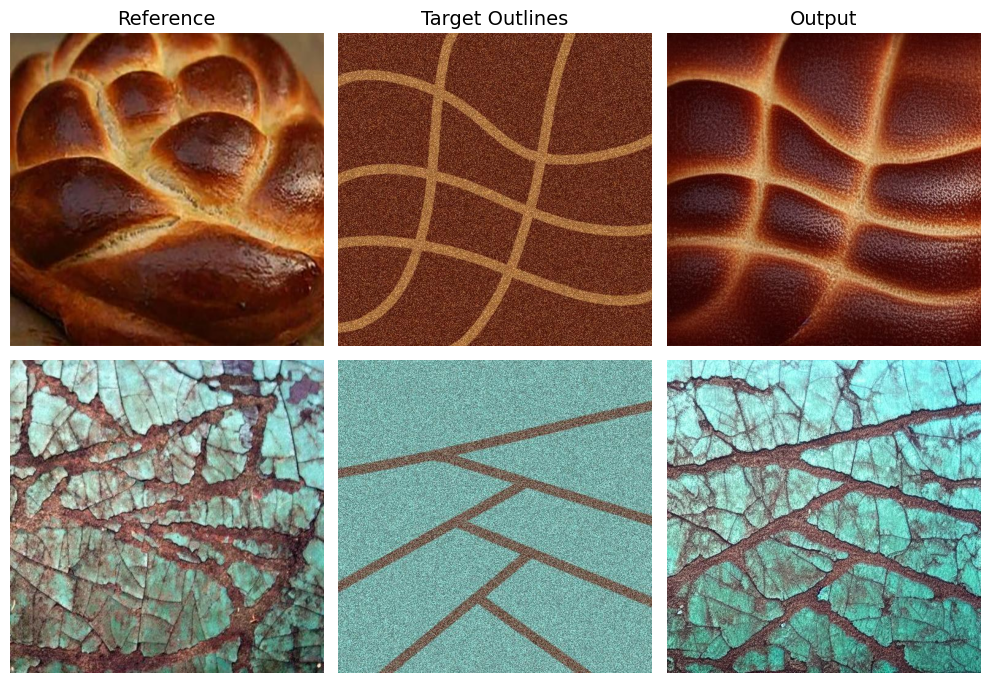

In [35]:
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_paths = [
    "workdir/exp/Sample_5/refs.jpg", "workdir/exp/Sample_5/target.jpg", "workdir/exp/Sample_5/result_02.jpg",
    "workdir/exp/Sample_8/refs.jpg", "workdir/exp/Sample_8/target.jpg", "workdir/exp/Sample_8/result_02.jpg",
]

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
titles = ["Reference", "Target Outlines", "Output"]

for i, ax in enumerate(axes.flat):
    img = mpimg.imread(image_paths[i])
    ax.imshow(img)
    ax.axis('off')
    if i < 3:
        ax.set_title(titles[i], fontsize=14)

plt.tight_layout()


## Figure 11 in the Paper

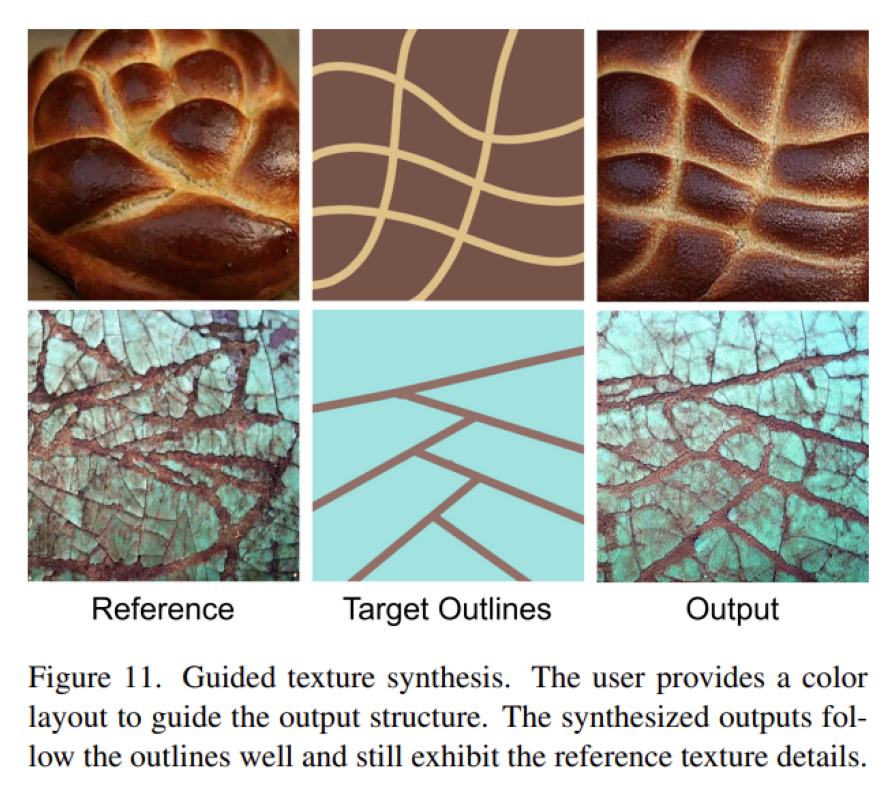

In [42]:
image_path = "figure11.png"
img = mpimg.imread(image_path)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')  
plt.show()

# Conclusion
The reproduced Figure 11 closely mirrors the original paper’s results, successfully maintaining the guided texture synthesis process. The generated textures follow the target outlines while preserving details from the reference images. Minor differences in sharpness and blending may stem from variations in model settings or training conditions. Overall, the reproduction confirms that self-rectification is an effective method for structured texture generation, making it valuable for graphics and design.

# logs

In [44]:
!cat logs/selfRecJob_993779.out

### Starting TaskPrologue of job 993779 on tg095 at Thu 13 Feb 2025 06:47:07 PM CET
Running on cores 0-31 with governor ondemand
Thu Feb 13 18:47:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.86.15              Driver Version: 570.86.15      CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          On  |   00000000:01:00.0 Off |                    0 |
| N/A   37C    P0             52W /  400W |       1MiB /  40960MiB |      0%      Default |
|          

In [49]:
!cat logs/selfRecJob_993706.out

### Starting TaskPrologue of job 993706 on tg093 at Thu 13 Feb 2025 06:04:47 PM CET
Running on cores 0-31 with governor ondemand
Thu Feb 13 18:04:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.86.15              Driver Version: 570.86.15      CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          On  |   00000000:01:00.0 Off |                    0 |
| N/A   34C    P0             57W /  400W |       1MiB /  40960MiB |      0%      Default |
|          

Username for 'https://github.com': ^C
